#Initialisation:Importing Libraries and Data

In [139]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [140]:
df = pd.read_csv('train.csv')

#Explorative Analysis: Descriptive Statistics and Visualisations

##Descriptive Statistics

In [141]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,PatientId
0,62,M,ATA,131,0,0,Normal,130,N,0.1,Up,0,474
1,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1,370
2,50,M,ASY,150,215,0,Normal,140,Y,0.0,Up,0,205
3,61,F,ATA,140,298,1,Normal,120,Y,0.0,Up,0,544
4,53,M,ASY,125,0,1,Normal,120,N,1.5,Up,1,302


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             688 non-null    int64  
 1   Sex             688 non-null    object 
 2   ChestPainType   688 non-null    object 
 3   RestingBP       688 non-null    int64  
 4   Cholesterol     688 non-null    int64  
 5   FastingBS       688 non-null    int64  
 6   RestingECG      688 non-null    object 
 7   MaxHR           688 non-null    int64  
 8   ExerciseAngina  688 non-null    object 
 9   Oldpeak         688 non-null    float64
 10  ST_Slope        688 non-null    object 
 11  HeartDisease    688 non-null    int64  
 12  PatientId       688 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 70.0+ KB


In [143]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,PatientId
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,53.380814,132.904070,200.460756,0.238372,136.594477,0.901017,0.565407,451.779070
std,9.400690,18.025038,110.493566,0.426398,25.679580,1.061356,0.496064,260.959924
min,28.000000,92.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,119.000000,0.000000,0.000000,230.750000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,446.500000
75%,60.000000,140.000000,267.250000,0.000000,155.000000,1.500000,1.000000,681.250000
max,77.000000,200.000000,603.000000,1.000000,202.000000,4.400000,1.000000,916.000000


None of the numerical values have a correlation factor of 0.5 magnitude or higher so, it can be hypothesized that they are not related.

In [144]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]
corr_matrix = df_numeric.corr()
corr_matrix

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,PatientId
Age,1.000000,0.273095,-0.063992,0.201012,-0.397127,0.282825,0.291494,0.292478
RestingBP,0.273095,1.000000,0.102720,0.056955,-0.099743,0.188067,0.108307,0.011223
Cholesterol,-0.063992,0.102720,1.000000,-0.236551,0.210487,0.100561,-0.211103,0.105995
FastingBS,0.201012,0.056955,-0.236551,1.000000,-0.125158,0.063148,0.256500,0.049438
MaxHR,-0.397127,-0.099743,0.210487,-0.125158,1.000000,-0.155104,-0.400989,0.158567
Oldpeak,0.282825,0.188067,0.100561,0.063148,-0.155104,1.000000,0.392319,0.192431
HeartDisease,0.291494,0.108307,-0.211103,0.256500,-0.400989,0.392319,1.000000,0.063664
PatientId,0.292478,0.011223,0.105995,0.049438,0.158567,0.192431,0.063664,1.000000


##Visualisations

Sex
M    549
F    139
Name: count, dtype: int64


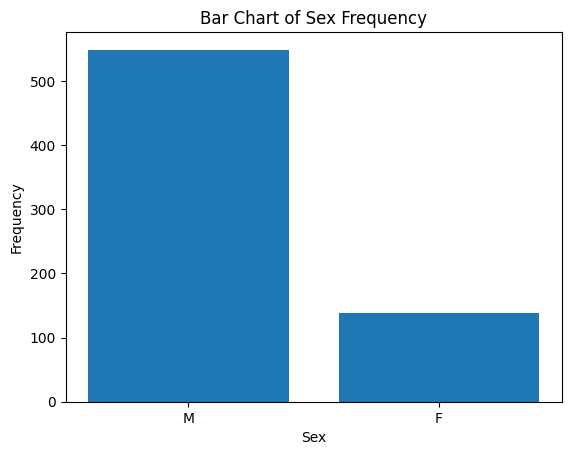

In [145]:
frequency_table = df['Sex'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Bar Chart of Sex Frequency')
plt.show()

ChestPainType
ASY    375
NAP    149
ATA    129
TA      35
Name: count, dtype: int64


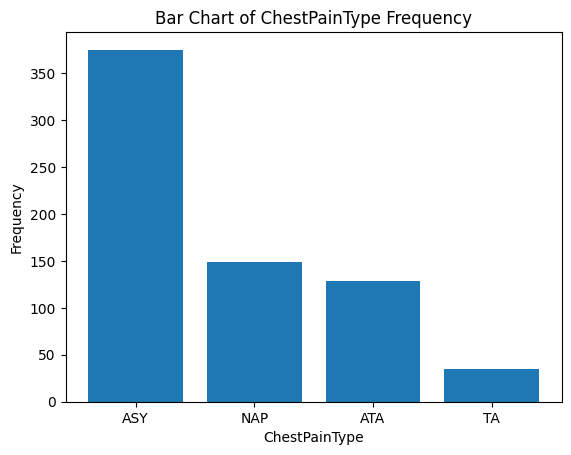

In [146]:
frequency_table = df['ChestPainType'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('ChestPainType')
plt.ylabel('Frequency')
plt.title('Bar Chart of ChestPainType Frequency')
plt.show()

RestingECG
Normal    416
LVH       139
ST        133
Name: count, dtype: int64


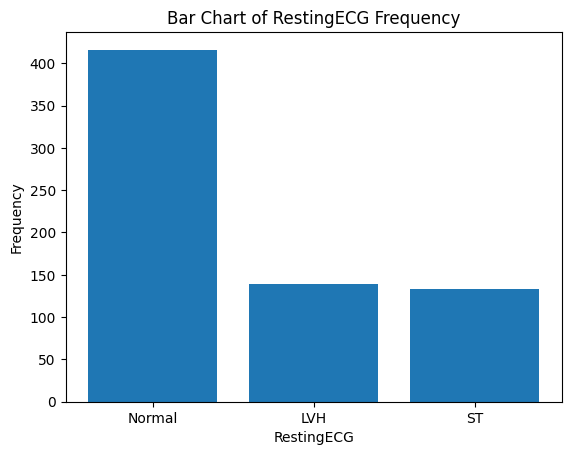

In [147]:
frequency_table = df['RestingECG'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('RestingECG')
plt.ylabel('Frequency')
plt.title('Bar Chart of RestingECG Frequency')
plt.show()

ExerciseAngina
N    407
Y    281
Name: count, dtype: int64


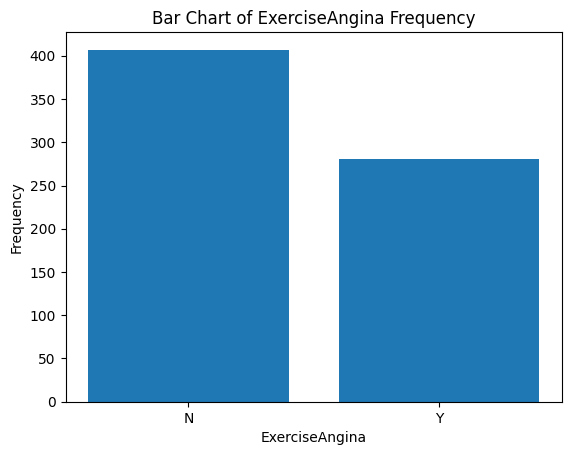

In [148]:
frequency_table = df['ExerciseAngina'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('ExerciseAngina')
plt.ylabel('Frequency')
plt.title('Bar Chart of ExerciseAngina Frequency')
plt.show()

ST_Slope
Flat    349
Up      291
Down     48
Name: count, dtype: int64


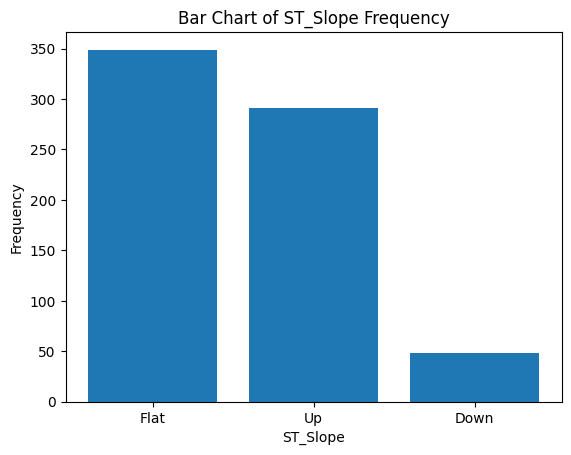

In [149]:
frequency_table = df['ST_Slope'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('ST_Slope')
plt.ylabel('Frequency')
plt.title('Bar Chart of ST_Slope Frequency')
plt.show()

HeartDisease
1    389
0    299
Name: count, dtype: int64


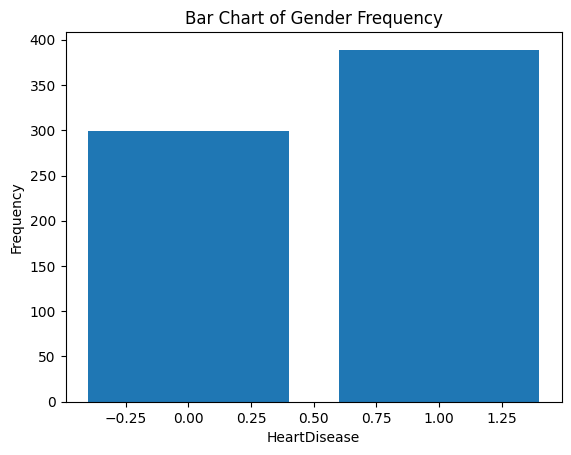

In [150]:
frequency_table = df['HeartDisease'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('HeartDisease')
plt.ylabel('Frequency')
plt.title('Bar Chart of Gender Frequency')
plt.show()

FastingBS
0    524
1    164
Name: count, dtype: int64


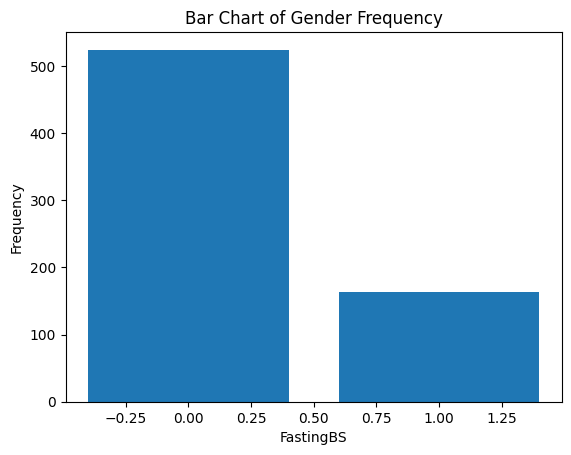

In [151]:
frequency_table = df['FastingBS'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('FastingBS')
plt.ylabel('Frequency')
plt.title('Bar Chart of Gender Frequency')
plt.show()

There is a significant change in the ratio of persons with NAP and ASY chest pains across those with heart disease and those without. It can be hypothesize that this is a factor affectibg heart disease.

ChestPainType
ATA    110
NAP     92
ASY     77
TA      20
Name: count, dtype: int64


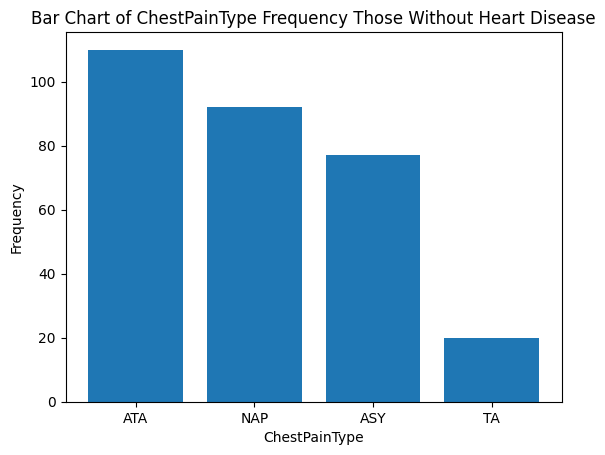

In [152]:
frequency_table = df[df['HeartDisease'] == 0]['ChestPainType'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('ChestPainType')
plt.ylabel('Frequency')
plt.title('Bar Chart of ChestPainType Frequency Those Without Heart Disease')
plt.show()

ChestPainType
ASY    298
NAP     57
ATA     19
TA      15
Name: count, dtype: int64


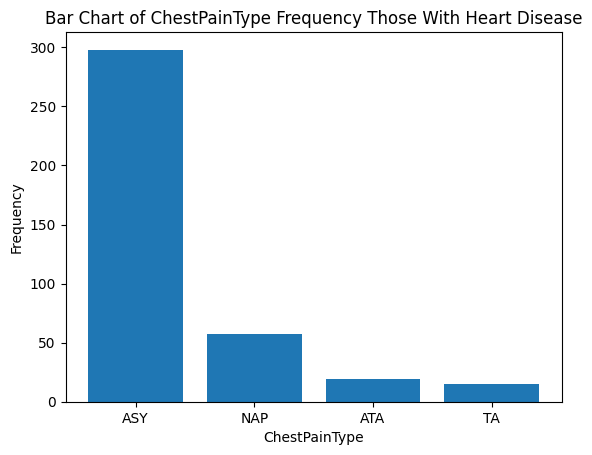

In [153]:
frequency_table = df[df['HeartDisease'] == 1]['ChestPainType'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('ChestPainType')
plt.ylabel('Frequency')
plt.title('Bar Chart of ChestPainType Frequency Those With Heart Disease')
plt.show()

These graphs indicate that persons with a high fasting BS were more likely to have heart disease.

FastingBS
0    265
1     34
Name: count, dtype: int64


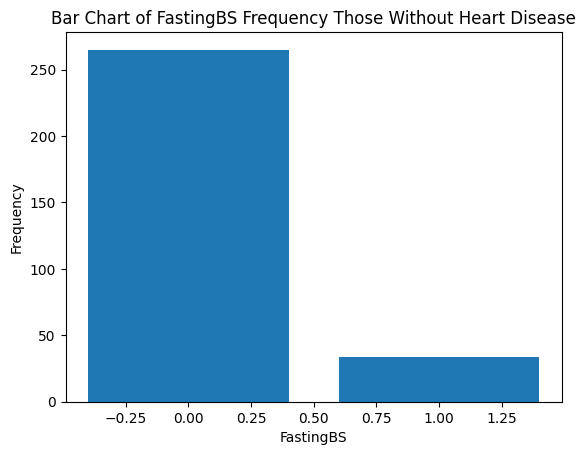

In [154]:
frequency_table = df[df['HeartDisease'] == 0]['FastingBS'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('FastingBS')
plt.ylabel('Frequency')
plt.title('Bar Chart of FastingBS Frequency Those Without Heart Disease')
plt.show()

FastingBS
0    259
1    130
Name: count, dtype: int64


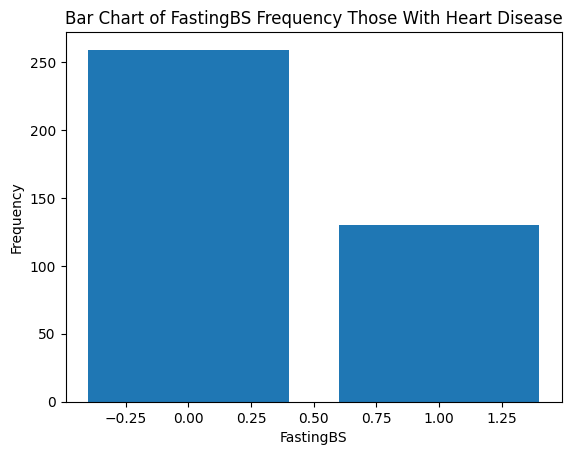

In [155]:
frequency_table = df[df['HeartDisease'] == 1]['FastingBS'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('FastingBS')
plt.ylabel('Frequency')
plt.title('Bar Chart of FastingBS Frequency Those With Heart Disease')
plt.show()

There is no significant changes in the ratios of resting ecg's among people with heart disease and people without, so it may not be a determining fator.

RestingECG
Normal    189
LVH        64
ST         46
Name: count, dtype: int64


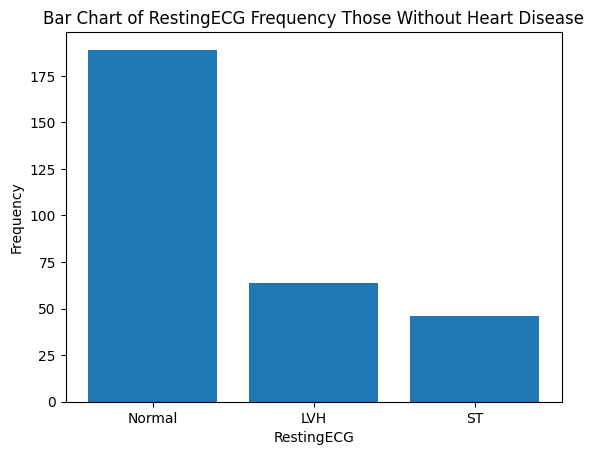

In [156]:
frequency_table = df[df['HeartDisease'] == 0]['RestingECG'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('RestingECG')
plt.ylabel('Frequency')
plt.title('Bar Chart of RestingECG Frequency Those Without Heart Disease')
plt.show()

RestingECG
Normal    227
ST         87
LVH        75
Name: count, dtype: int64


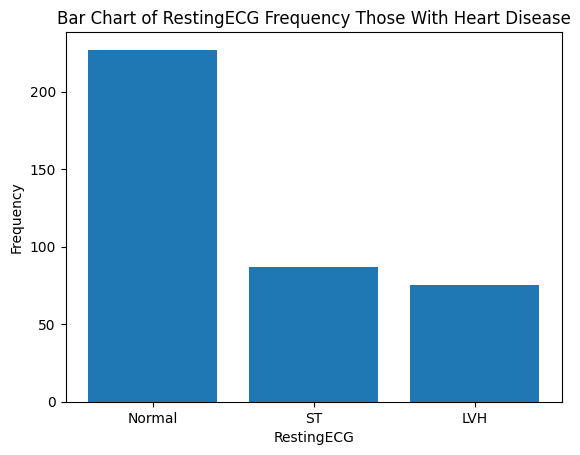

In [157]:
frequency_table = df[df['HeartDisease'] == 1]['RestingECG'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('RestingECG')
plt.ylabel('Frequency')
plt.title('Bar Chart of RestingECG Frequency Those With Heart Disease')
plt.show()

Exercise angina may be linked to heart disease as most persons who don't experience it don't have heart disease and, most persons who do experience it have heart disease.

ExerciseAngina
N    262
Y     37
Name: count, dtype: int64


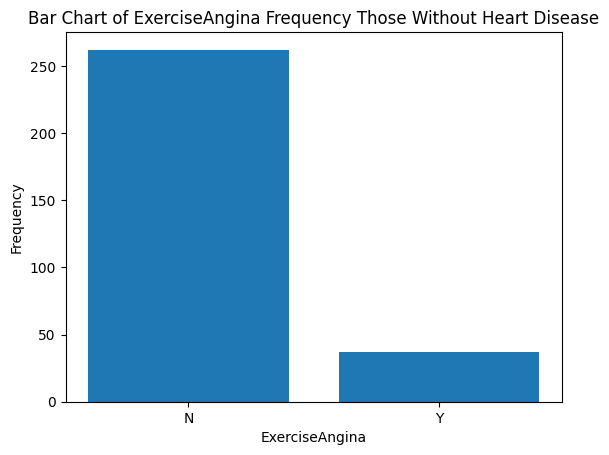

In [158]:
frequency_table = df[df['HeartDisease'] == 0]['ExerciseAngina'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('ExerciseAngina')
plt.ylabel('Frequency')
plt.title('Bar Chart of ExerciseAngina Frequency Those Without Heart Disease')
plt.show()

ExerciseAngina
Y    244
N    145
Name: count, dtype: int64


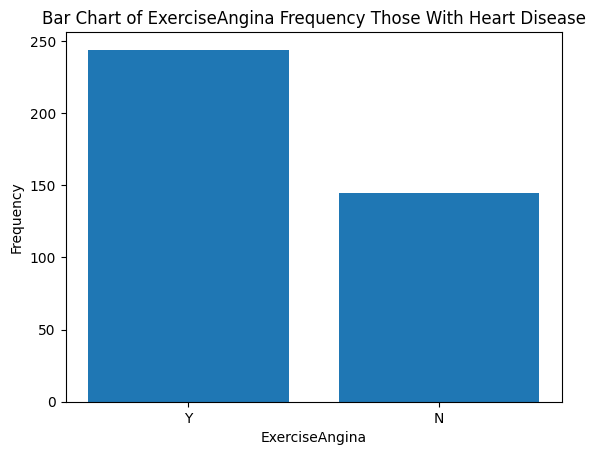

In [159]:
frequency_table = df[df['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('ExerciseAngina')
plt.ylabel('Frequency')
plt.title('Bar Chart of ExerciseAngina Frequency Those With Heart Disease')
plt.show()

These charts indicate that the type of ST_Slope could be an indication of heart disease as there's a significant difference in the ratio across those who have heart disease and those who don't. A Flat ST_Slope was more prevalent amongst those with heart disease.

ST_Slope
Up      231
Flat     56
Down     12
Name: count, dtype: int64


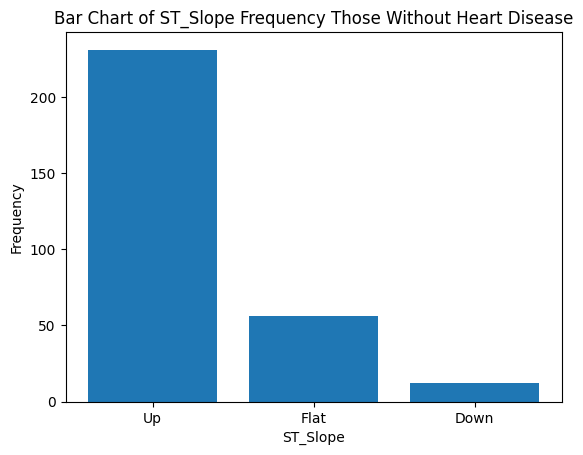

In [160]:
frequency_table = df[df['HeartDisease'] == 0]['ST_Slope'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('ST_Slope')
plt.ylabel('Frequency')
plt.title('Bar Chart of ST_Slope Frequency Those Without Heart Disease')
plt.show()

ST_Slope
Flat    293
Up       60
Down     36
Name: count, dtype: int64


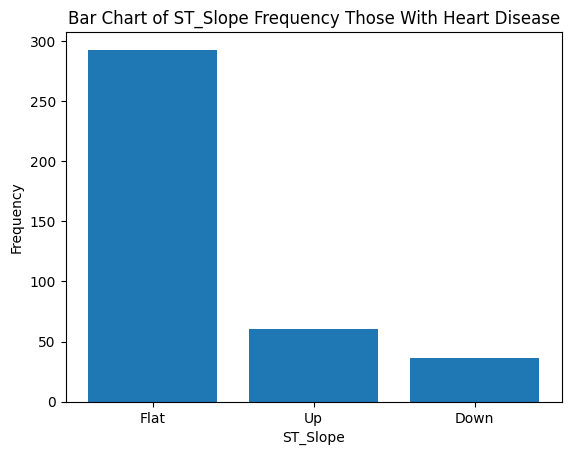

In [161]:
frequency_table = df[df['HeartDisease'] == 1]['ST_Slope'].value_counts()
print(frequency_table)
plt.bar(frequency_table.index, frequency_table.values)
plt.xlabel('ST_Slope')
plt.ylabel('Frequency')
plt.title('Bar Chart of ST_Slope Frequency Those With Heart Disease')
plt.show()

These histograms show that heart disease is more common in persons between 50 and 70 years old. They indicate that age may be a factor

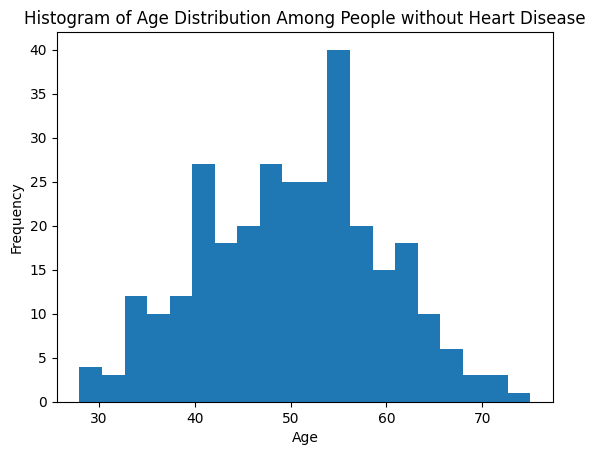

In [162]:
plt.hist(df[df['HeartDisease'] == 0]['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution Among People without Heart Disease')
plt.show()

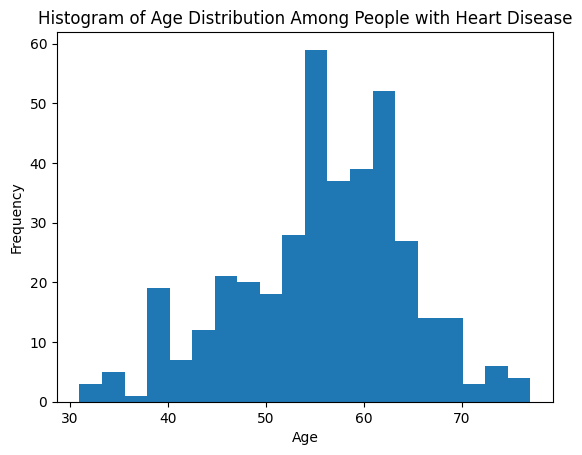

In [163]:
plt.hist(df[df['HeartDisease'] == 1]['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution Among People with Heart Disease')
plt.show()

These graphs have roughly the same shape so there may not be any relation between heart disease and resting BP.

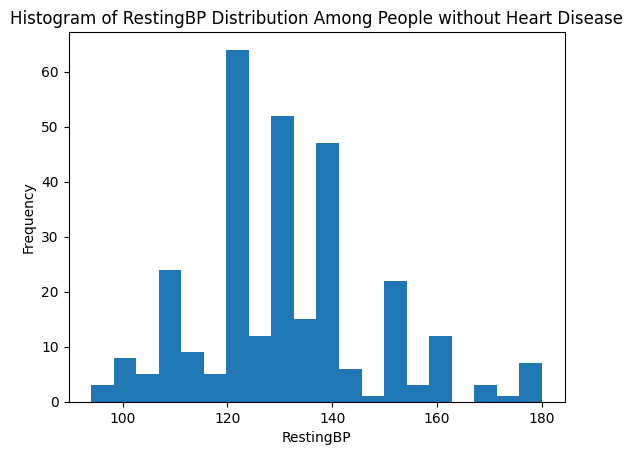

In [164]:
plt.hist(df[df['HeartDisease'] ==0]['RestingBP'], bins=20)
plt.xlabel('RestingBP')
plt.ylabel('Frequency')
plt.title('Histogram of RestingBP Distribution Among People without Heart Disease')
plt.show()

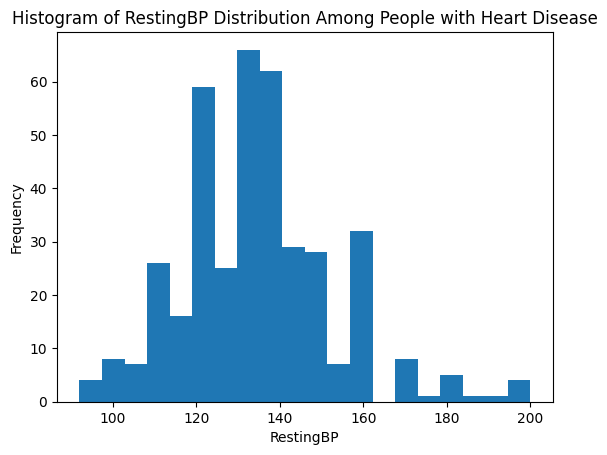

In [165]:
plt.hist(df[df['HeartDisease'] == 1]['RestingBP'], bins=20)
plt.xlabel('RestingBP')
plt.ylabel('Frequency')
plt.title('Histogram of RestingBP Distribution Among People with Heart Disease')
plt.show()

THese graphs show that persons with a lower old peak were less likely to have heart disease, while those with a higher old peak were more likely to have heart disease.

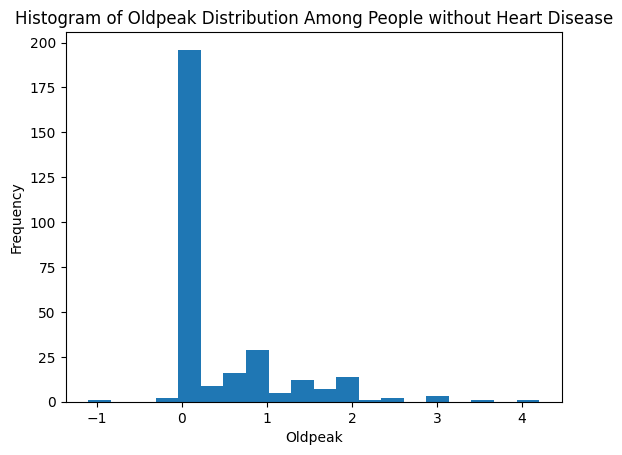

In [166]:
plt.hist(df[df['HeartDisease'] == 0]['Oldpeak'], bins=20)
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.title('Histogram of Oldpeak Distribution Among People without Heart Disease')
plt.show()

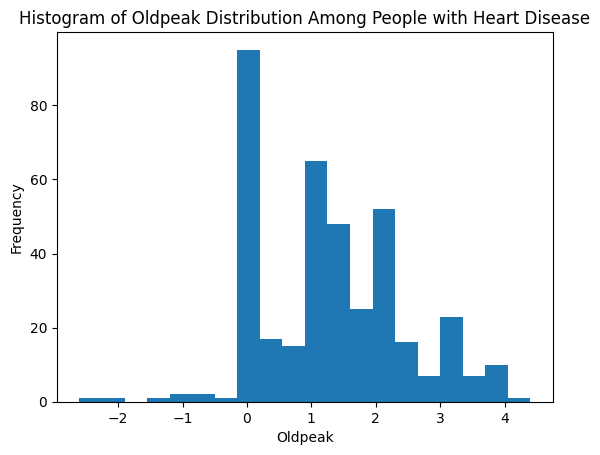

In [167]:
plt.hist(df[df['HeartDisease'] == 1]['Oldpeak'], bins=20)
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.title('Histogram of Oldpeak Distribution Among People with Heart Disease')
plt.show()

These graphs show some outliers with high cholesterol having heart disease but there is not enough data to make a conclusion. It also shows a high number of persons with 0 which may be a bad data.

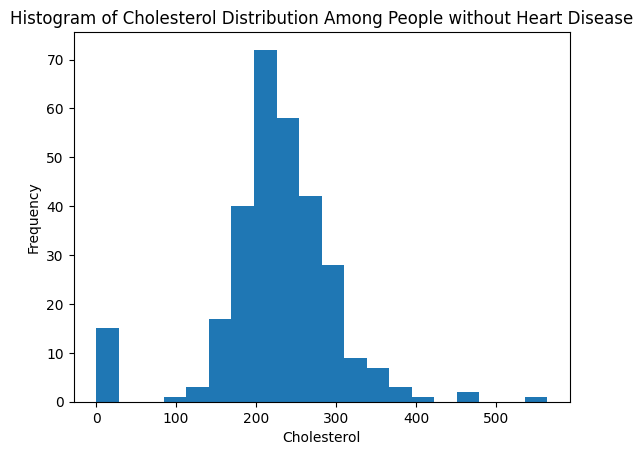

In [168]:
plt.hist(df[df['HeartDisease'] == 0]['Cholesterol'], bins=20)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol Distribution Among People without Heart Disease')
plt.show()

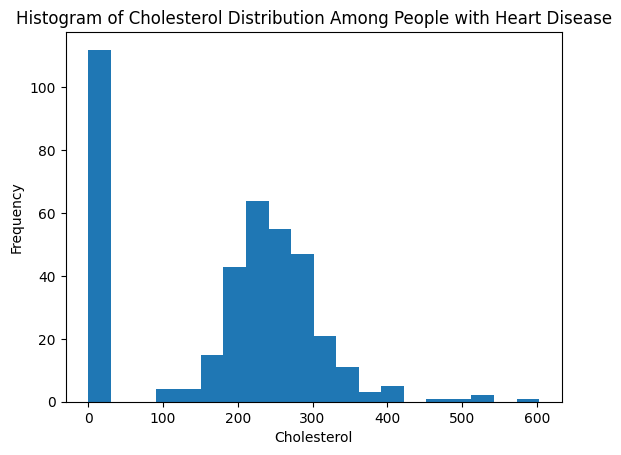

In [169]:
plt.hist(df[df['HeartDisease'] == 1]['Cholesterol'], bins=20)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol Distribution Among People with Heart Disease')
plt.show()

#Hypothesis Testing

Since the p-value is less that 0.05 than, sex does affect the chances of heart disease.


In [170]:
contingency_table = pd.crosstab(df['HeartDisease'], df['Sex'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 68.13056815445537
P-value: 1.5302001928359098e-16
Degrees of freedom: 1


Since the p-value is less than 0.05 then, fasting BS does affect the chances of heart disease.

In [171]:
contingency_table = pd.crosstab(df['HeartDisease'], df['FastingBS'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 44.05889044376512
P-value: 3.1864330337694894e-11
Degrees of freedom: 1


Since the p-value is less thn 0.05 then, chest pain type does affect the chances of heart disease.

In [172]:
contingency_table = pd.crosstab(df['HeartDisease'], df['ChestPainType'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 194.93475161060445
P-value: 5.2426663523067334e-42
Degrees of freedom: 3


Since the p-value is greater than 0.05 then, resting ecg does not affect the chances of heart disease.

In [173]:
contingency_table = pd.crosstab(df['HeartDisease'], df['RestingECG'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 5.298163079022778
P-value: 0.07071613321683357
Degrees of freedom: 2


Since the p-value is less than 0.05 then, exercise angina does affect the chances of heart disease.

In [174]:
contingency_table = pd.crosstab(df['HeartDisease'], df['ExerciseAngina'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 175.30584741636295
P-value: 5.1335499416148856e-40
Degrees of freedom: 1


Since the p-value is less than 0.05 then, age does affect the chances of heart disease.

In [175]:
contingency_table = pd.crosstab(df['HeartDisease'], df['Age'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 103.26242850255132
P-value: 9.600457600787979e-06
Degrees of freedom: 49


Since the p-value is less than 0.05 then, st slope does affect the chances of heart disease.

In [176]:
contingency_table = pd.crosstab(df['HeartDisease'], df['ST_Slope'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)

Chi-square statistic: 266.2094267024694
P-value: 1.5608367293232005e-58
Degrees of freedom: 2


Since the p-value is less than 0.05 then, resting bp does affect the chances of heart disease.

In [177]:
with_heart_disease = df[df['HeartDisease'] == 0]['RestingBP']
without_heart_disease = df[df['HeartDisease'] == 1]['RestingBP']
t_statistic, p_value = ttest_ind(with_heart_disease, without_heart_disease)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -2.8535281044968257
P-value: 0.004454002603349908


Since the p-value is less than 0.05 then, cholestrol does affect the chances of heart disease.

In [178]:
with_heart_disease = df[df['HeartDisease'] == 0]['Cholesterol']
without_heart_disease = df[df['HeartDisease'] == 1]['Cholesterol']
t_statistic, p_value = ttest_ind(with_heart_disease, without_heart_disease)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 5.656594961809157
P-value: 2.2678088828400785e-08


Since the p-value is less than 0.05 then, max hr does affect the chances of heart disease.

In [179]:
with_heart_disease = df[df['HeartDisease'] == 0]['MaxHR']
without_heart_disease = df[df['HeartDisease'] == 1]['MaxHR']
t_statistic, p_value = ttest_ind(with_heart_disease, without_heart_disease)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 11.464608692806788
P-value: 5.815095965372903e-28


Since the p-value is less than 0.05 then, old peak does affect the chances of heart disease.

In [180]:
with_heart_disease = df[df['HeartDisease'] == 0]['Oldpeak']
without_heart_disease = df[df['HeartDisease'] == 1]['Oldpeak']
t_statistic, p_value = ttest_ind(with_heart_disease, without_heart_disease)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -11.171066122529933
P-value: 9.765021714225617e-27


#Data Preprocessing and Feature Engineering

##Handling Null Values

Although there are no null values, the zero in the cholesterol column is being replaced with the median value. The zeros may have been an error since there is no patient with a level 1, 2 or 3.

In [181]:
df.isnull().sum()
median_value = df['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].replace(0, median_value)

##Feature Engineering and Encoding

Removing unwanted columns. The hypothesis tests showed that most columns affected the chances of having heart disease. Therefore, in order to reduce the likelihood of overfitting, only the factors with significanlty low p-values will beuse.

In [182]:
df_filtered = df
df_filtered = df_filtered.drop(columns=['RestingBP', 'FastingBS','Age', 'RestingECG','PatientId', 'Cholesterol'])
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             688 non-null    object 
 1   ChestPainType   688 non-null    object 
 2   MaxHR           688 non-null    int64  
 3   ExerciseAngina  688 non-null    object 
 4   Oldpeak         688 non-null    float64
 5   ST_Slope        688 non-null    object 
 6   HeartDisease    688 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 37.8+ KB


In [183]:
df_filtered = pd.get_dummies(df_filtered, columns=['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope'])

In [184]:
y = df['HeartDisease'].values
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [185]:
df_filtered = df_filtered.drop(columns=['HeartDisease'])

In [186]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MaxHR              688 non-null    int64  
 1   Oldpeak            688 non-null    float64
 2   Sex_F              688 non-null    bool   
 3   Sex_M              688 non-null    bool   
 4   ChestPainType_ASY  688 non-null    bool   
 5   ChestPainType_ATA  688 non-null    bool   
 6   ChestPainType_NAP  688 non-null    bool   
 7   ChestPainType_TA   688 non-null    bool   
 8   ExerciseAngina_N   688 non-null    bool   
 9   ExerciseAngina_Y   688 non-null    bool   
 10  ST_Slope_Down      688 non-null    bool   
 11  ST_Slope_Flat      688 non-null    bool   
 12  ST_Slope_Up        688 non-null    bool   
dtypes: bool(11), float64(1), int64(1)
memory usage: 18.3 KB


In [187]:
X = df_filtered.values
X

array([[130, 0.1, False, ..., False, False, True],
       [63, 0.5, False, ..., False, False, True],
       [140, 0.0, False, ..., False, False, True],
       ...,
       [111, 0.0, False, ..., False, False, True],
       [121, 1.8, False, ..., False, False, True],
       [150, 1.0, True, ..., False, True, False]], dtype=object)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(550, 13)

In [189]:
y_train.shape

(550,)

In [190]:
X_test.shape

(138, 13)

In [191]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train.shape

(550, 13)

In [192]:
X_test = sc.transform(X_test)

#Model Training and Selection

In [193]:
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

results = {}

In [194]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }

In [195]:
for model_name, result in results.items():
    print(f"{model_name} Results:")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Precision: {result['Precision']}")
    print(f"Recall: {result['Recall']}")
    print(f"F1 Score: {result['F1 Score']}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}\n")

best_model = max(results, key=lambda x: results[x]['Accuracy'])
print(f"Best Model based on Accuracy: {best_model}")

SVM Results:
Accuracy: 0.8478260869565217
Precision: 0.847538868642352
Recall: 0.8478260869565217
F1 Score: 0.8476370510396976
Confusion Matrix:
[[47 11]
 [10 70]]

Random Forest Results:
Accuracy: 0.782608695652174
Precision: 0.781813361611877
Recall: 0.782608695652174
F1 Score: 0.7820436760177417
Confusion Matrix:
[[42 16]
 [14 66]]

Logistic Regression Results:
Accuracy: 0.8333333333333334
Precision: 0.8337981835085461
Recall: 0.8333333333333334
F1 Score: 0.8335214750309089
Confusion Matrix:
[[47 11]
 [12 68]]

Best Model based on Accuracy: SVM
